Gráfico de crescimento de custo


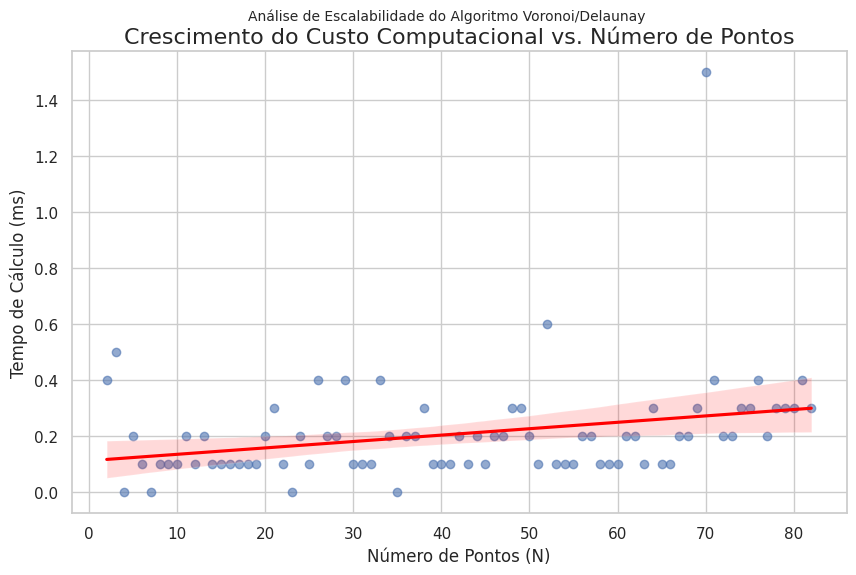


Gráfico de comparação de distribuição
Gráfico salvo como 'grafico_comparacao_distribuicao.png'


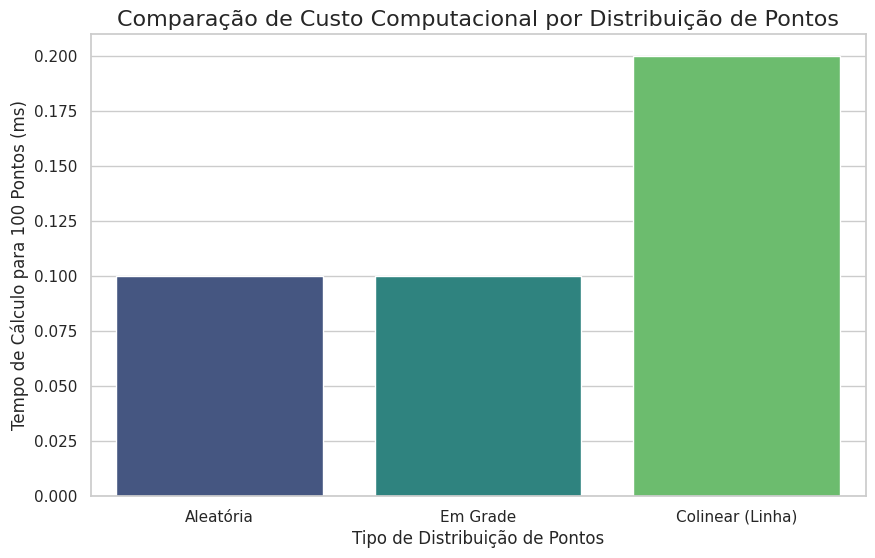

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_theme(style="whitegrid")

def plotar_crescimento_custo(filename='performance_data.json'):

    try:
        with open(filename, 'r') as f:
            data = json.load(f)
        df = pd.DataFrame(data['data'], columns=data['columns'])
    except FileNotFoundError:
        print(f"Arquivo nao encontrado")
        return

    plt.figure(figsize=(10, 6))
    sns.regplot(x='num_pontos', y='tempo_ms', data=df,
                scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

    plt.title('Crescimento do Custo Computacional vs. Número de Pontos', fontsize=16)
    plt.xlabel('Número de Pontos (N)', fontsize=12)
    plt.ylabel('Tempo de Cálculo (ms)', fontsize=12)
    plt.suptitle('Análise de Escalabilidade do Algoritmo Voronoi/Delaunay', y=0.95, fontsize=10)

    output_filename = 'grafico_crescimento_custo.png'
    plt.savefig(output_filename, dpi=300)

    plt.show()

def plotar_diferenca_distribuicao():
    distribuicoes = {
        'Aleatória': 'random_data.json',
        'Em Grade': 'grid_data.json',
        'Colinear (Linha)': 'line_data.json'
    }

    lista_dfs = []
    for nome, filename in distribuicoes.items():
        try:
            with open(filename, 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data['data'], columns=data['columns'])
            df['distribuicao'] = nome
            ultimo_calculo = df.iloc[[-1]].copy()
            lista_dfs.append(ultimo_calculo)
        except FileNotFoundError:
            print(f"Erro")
            continue

    full_df = pd.concat(lista_dfs)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='distribuicao', y='tempo_ms', data=full_df, palette='viridis', hue='distribuicao', legend=False)

    plt.title('Comparação de Custo Computacional por Distribuição de Pontos', fontsize=16)
    plt.xlabel('Tipo de Distribuição de Pontos', fontsize=12)
    plt.ylabel(f'Tempo de Cálculo para {full_df["num_pontos"].iloc[0]} Pontos (ms)', fontsize=12)

    output_filename = 'grafico_comparacao_distribuicao.png'
    plt.savefig(output_filename, dpi=300)
    print(f"Gráfico salvo como '{output_filename}'")

    plt.show()


if __name__ == '__main__':
    print("Gráfico de crescimento de custo")
    plotar_crescimento_custo()

    print("\nGráfico de comparação de distribuição")
    plotar_diferenca_distribuicao()